# Build a Simple workflow or Graph using LangGraph

In [2]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info:str

In [3]:
def start_play(state:State):
    print("Start Play Node has Been Called...")
    return {"graph_info":state["graph_info"]+" I'm Planning to Reading "}


def story_books(state:State):
    print("Story Books Node has Been Called...")
    return {"graph_info":state["graph_info"]+"  Story Books"}

def moral_books(state:State):
    print("Moral Book Node has Been Called...")
    return {"graph_info":state["graph_info"]+" Moral Books"}

In [4]:
import random
from typing import Literal

def random_play(state:State)->Literal["story_books","moral_books"]:
    graph_info = state['graph_info']
    
    if random.random()>0.5:
        return "story_books"
    else:
        return "moral_books"

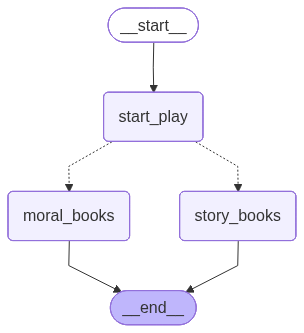

In [5]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

# Build a Graph

# Initilize the Graph 
graph = StateGraph(State)

#Adding a NOdes
graph.add_node("start_play",start_play)
graph.add_node("story_books",story_books)
graph.add_node("moral_books",moral_books)

# Add the edges
graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("story_books",END)
graph.add_edge("moral_books",END)

#Compile The Graph

graph_builder = graph.compile()

## View The Graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [ ]:
graph_builder.invoke({"graph_info":" My Name is Husen"})

Start Play Node has Been Called...
Story Books Node has Been Called...


{'graph_info': " My Name is Husen I'm Planning to Reading   Story Books"}

In [10]:

import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

llm = ChatGroq(model="llama-3.1-8b-instant")

system_message = "Convert user language {language} Language"

prompt = ChatPromptTemplate.from_messages(
    [
        ("system",system_message),
        ("user","{input}")
    ]
)

parser = StrOutputParser()

chain = prompt|llm|parser

chain.invoke({
    "language":"Kannada",
    "input":"Hi How are you",
    
})





'ನಿಮ್ಮಿಂದ ಹರಿಯುವ ಹೃದಯೋದ್ಗಾರಗಳಿಗೆ ನಾನು ಧನ್ಯವಾದಗಳು. ನಾನು ಖುಷಿ. ನೀವು ಯಾವುದಾದರೂ ಸಹಾಯೆಯ ಬಗ್ಗೆಯೇ ಕೇಳಿದರೆ, ನಾನು ಹೇಗೆ ಸಹಾಯ ಮಾಡಬಹುದೆಂದು ನೀವು ನನಗೆ ತಿಳಿಸಿ.'